# Creating graphs

From a csv file with at least three columns, two with words and one with a frequency. 

In [4]:
import sqlite3
import pandas as pd
import networkx as nx
import dhlab.graph_networkx_louvain as gnl

# Functions 

In [5]:
def query(db, sql, param=()):
    """ Query a sqlitedatabase with sql and param"""
    with sqlite3.connect(db) as con:
        cur = con.cursor()
        cur.execute(sql, param)
    return cur.fetchall()

In [6]:
def check_graph_first(db, x, top = 20):
    return query(db, "select * from word_graph where first = ? order by pmi desc limit ?", (x, top))
def check_graph_second(db, x, top = 20):
    return query(db, "select * from word_graph where second = ? order by pmi desc limit ?", (x, top))

# Querying word graphs

The table of word pairs is computed using the ngram-table and named word_graph. Indexed and ready to use.

The columns of the word_graph table are first, second, freq, pmi where freq contains the original frequencies, and pmi is the computed association value, using the following formula:

$$\frac{\textrm{freq}(x,y)^2}{\textrm{freq}(x)*\textrm{freq}(y)}$$
 
The frequency is squared to give the cooccurence frequency a higher weight. The marginals freq(x) are aggregated from the word positions. For each word  𝑤  it is associated with two frequencies, one frequency from the occurence in the first column, and one from the second column.



In [1]:
word_graphs = "c://Users/larsj/Documents/word_graphs_databases/book_news_word_pairs.db"

In [2]:
def expand(db, x, top = 30):
    a = check_graph_first(db, x, top)
    b = check_graph_second(db, x, top)
    words = {x[1] for x in a} | {x[0] for x in b} - {x}
    G = a + b
    for word in words:
        G += check_graph_first(db, word, top) + check_graph_second(db, word, top)
    return G

In [32]:
edges = [tuple(x[:3]) for x in expand(word_graphs, "øl", top = 20)]
g = nx.DiGraph()
g.add_weighted_edges_from(edges)
g = g.subgraph([n for n,d in g.out_degree() if d > 0])

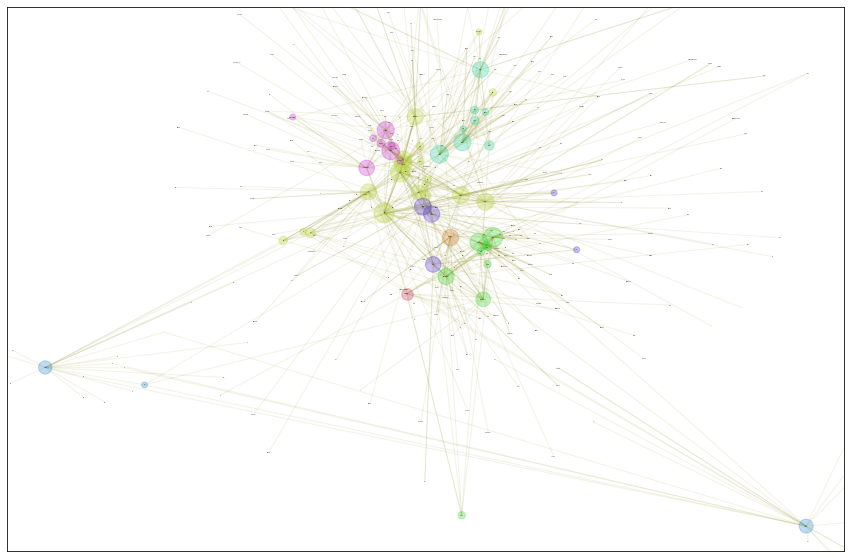

In [33]:
gnl.show_graph(g, spread = .4, fontsize = 1)

In [31]:
gnl.show_communities(g)

korona-Trump :  korona, Trump, smittevern, kolera, smitte, kreft, karantene, hjemmekontor, pandemi, smitteverntiltak, smittefare, reiserestriksjoner, nedstengning, nedstenging, smittevernregler, restriksjoner, covid-19, ,, pollenallergi, isolasjon, tiltak, permitteringer, Korona, sykdom, koronavirus, heimekontor, avstand, avstandskrav, tuberkulose, hytteforbudet, koronasituasjonen, pest, koronapandemien, smittevernhensyn, portforbud, pandemien, hjemmeskole, smittesporing, hygiene, dysenteri, diabetes, Bolsonaro, Biden, hjerte-karsykdommer, byllepest, Hygiene, Rouhani, retningslinjer, astma, Pest, tyfoidfeber, testing, koronatiltak, infeksjoner, høysnue, Comey, hjertesykdommer, Tillerson, dyresykdommer, avstandsregler, oppstart, flekktyfus, klimaendringer, epidemi, fleksitid, Clinton, heimeskule, kromosfære, Kim, Erdogan, virus, hjertekarsykdommer, drift, lockdown, tyfus, kopper, hjertesykdom, koronarestriksjoner, skade, gulfeber, Xi, firmabil, brexit, sjukdom, Putin, munnbind, anbefali